In [1]:
# TODO: move shared configuration values to a seperate file

In [2]:
from src import scalability_analysis

In [3]:
# read the log messages
lines = scalability_analysis.read_log_lines()
len(lines), lines

(2705,
 ['2023-05-02 20:19:48,327 - src.count_ngrams_in_batches - INFO - Starting to count ngrams in batches',
  "2023-05-02 20:20:33,385 - src.count_ngrams_in_batches - INFO - started working on samples 20000000-20999999;memory (MB): {'total': 8066, 'used': 6084, 'available': 1982}",
  "2023-05-02 20:20:46,091 - src.count_ngrams_in_batches - INFO - started working on samples 0-999999;memory (MB): {'total': 8066, 'used': 6681, 'available': 1385}",
  "2023-05-02 20:20:46,233 - src.count_ngrams_in_batches - INFO - started working on samples 10000000-10999999;memory (MB): {'total': 8066, 'used': 6761, 'available': 1305}",
  "2023-05-02 20:24:28,621 - src.count_ngrams_in_batches - INFO - finished samples 20000000 to 20999999;memory (MB): {'total': 8066, 'used': 7031, 'available': 1035};counter size (MB): 0",
  "2023-05-02 20:25:03,640 - src.count_ngrams_in_batches - INFO - finished samples 10000000 to 10999999;memory (MB): {'total': 8066, 'used': 7103, 'available': 963};counter size (MB): 

In [4]:
# filter the lines that match the log_line_regex
log_line_regex_match_condition = scalability_analysis.get_regex_match_condition(scalability_analysis.log_line_regex)
lines = list(filter(log_line_regex_match_condition, lines))
len(lines), lines

(2174,
 ['2023-05-02 20:19:48,327 - src.count_ngrams_in_batches - INFO - Starting to count ngrams in batches',
  "2023-05-02 20:20:33,385 - src.count_ngrams_in_batches - INFO - started working on samples 20000000-20999999;memory (MB): {'total': 8066, 'used': 6084, 'available': 1982}",
  "2023-05-02 20:20:46,091 - src.count_ngrams_in_batches - INFO - started working on samples 0-999999;memory (MB): {'total': 8066, 'used': 6681, 'available': 1385}",
  "2023-05-02 20:20:46,233 - src.count_ngrams_in_batches - INFO - started working on samples 10000000-10999999;memory (MB): {'total': 8066, 'used': 6761, 'available': 1305}",
  "2023-05-02 20:24:28,621 - src.count_ngrams_in_batches - INFO - finished samples 20000000 to 20999999;memory (MB): {'total': 8066, 'used': 7031, 'available': 1035};counter size (MB): 0",
  "2023-05-02 20:25:03,640 - src.count_ngrams_in_batches - INFO - finished samples 10000000 to 10999999;memory (MB): {'total': 8066, 'used': 7103, 'available': 963};counter size (MB): 

In [5]:
# filter the log messages that are only from that module
module_name = 'src.compute_max_segmentation_log_likelihood_sum'
module_condition = scalability_analysis.get_module_name_condition(module_name)
module_lines = list(filter(module_condition, lines))
len(module_lines), module_lines

(72,
 ['2023-05-09 09:05:36,682 - src.compute_max_segmentation_log_likelihood_sum - INFO - start',
  '2023-05-09 09:05:36,683 - src.compute_max_segmentation_log_likelihood_sum - INFO - computing for ngram_size=2',
  '2023-05-09 09:05:36,684 - src.compute_max_segmentation_log_likelihood_sum - INFO - doing update for split_i=1',
  '2023-05-09 09:05:36,684 - src.compute_max_segmentation_log_likelihood_sum - INFO - executing query=UPDATE ngram_of_size_2_table SET max_segmentation_log_likelihood_sum = left_table.log_likelihood + right_table.log_likelihood FROM ngram_of_size_2_table main_table INNER JOIN ngram_of_size_1_table left_table ON (main_table.token_0 = left_table.token_0) INNER JOIN ngram_of_size_1_table right_table ON (main_table.token_1 = right_table.token_0)  WHERE (main_table.token_0 = ngram_of_size_2_table.token_0 AND main_table.token_1 = ngram_of_size_2_table.token_1)',
  '2023-05-09 09:05:36,699 - src.compute_max_segmentation_log_likelihood_sum - INFO - computing for ngram_si

In [6]:
# take only the log messages that are from the last run of this module
module_start_message = 'start'
module_start_condition = scalability_analysis.get_message_condition(module_start_message)
last_module_lines = scalability_analysis.get_last_slice(module_lines, module_start_condition)
len(last_module_lines), last_module_lines

(26,
 ['2023-05-09 14:28:28,386 - src.compute_max_segmentation_log_likelihood_sum - INFO - start',
  '2023-05-09 14:28:28,391 - src.compute_max_segmentation_log_likelihood_sum - INFO - computing for ngram_size=2',
  '2023-05-09 14:28:28,488 - src.compute_max_segmentation_log_likelihood_sum - INFO - doing update for split_i=1',
  '2023-05-09 14:28:28,488 - src.compute_max_segmentation_log_likelihood_sum - INFO - executing query=UPDATE ngram_of_size_2_table SET max_segmentation_log_likelihood_sum = left_table.log_likelihood + right_table.log_likelihood FROM ngram_of_size_2_table main_table INNER JOIN ngram_of_size_1_table left_table ON (main_table.token_0 = left_table.token_0) INNER JOIN ngram_of_size_1_table right_table ON (main_table.token_1 = right_table.token_0)  WHERE (main_table.token_0 = ngram_of_size_2_table.token_0 AND main_table.token_1 = ngram_of_size_2_table.token_1)',
  '2023-05-09 14:29:02,062 - src.compute_max_segmentation_log_likelihood_sum - INFO - computing for ngram_si

In [7]:
# take the total time and extrapulate it to larger data sets with n log n variability.
module_start_line, module_end_line = last_module_lines[0], last_module_lines[-1]
module_start_line, module_end_line

('2023-05-09 14:28:28,386 - src.compute_max_segmentation_log_likelihood_sum - INFO - start',
 '2023-05-09 15:03:31,911 - src.compute_max_segmentation_log_likelihood_sum - INFO - end')

In [23]:
total_module_time_seconds = scalability_analysis.get_lines_timedelta_seconds(module_start_line, module_end_line)
total_module_time_seconds
total_module_time_hours = scalability_analysis.seconds_to_hours(total_module_time_seconds)
total_module_time_hours

0.5841666666666666

In [9]:
n_tokens_processed = scalability_analysis.get_n_tokens_processed()
n_tokens_processed

442371415

In [10]:
wikipedia_expected_time_seconds = scalability_analysis.extrapolate_time_n_log_n(
    actual_n=n_tokens_processed,
    expected_n=scalability_analysis.N_TOKENS_WIKIPEDIA,
    actual_time=total_module_time_seconds
)
wikipedia_expected_time_hours = scalability_analysis.seconds_to_hours(wikipedia_expected_time_seconds)
wikipedia_expected_time_hours

38.050696825138935

In [11]:
red_pajama_expected_time_seconds = scalability_analysis.extrapolate_time_n_log_n(
    actual_n=n_tokens_processed,
    expected_n=scalability_analysis.N_TOKENS_RED_PAJAMA,
    actual_time=total_module_time_seconds,
)
red_pajama_expected_time_days = scalability_analysis.seconds_to_days(red_pajama_expected_time_seconds)
red_pajama_expected_time_days

92.24709176323775

In [14]:
# plot the time with respect to the ngram size
import re
ngram_size_start_regex = re.compile(r'computing for ngram_size=(?P<ngram_size>\d+)')
match_start_regex_condition = scalability_analysis.get_regex_match_condition(ngram_size_start_regex)
ngram_size_start_condition = lambda line: match_start_regex_condition(scalability_analysis.parse_line(line)['message'])

def extract_ngram_size(line: str):
    message = scalability_analysis.parse_line(line)['message']
    return int(ngram_size_start_regex.match(message).group('ngram_size'))

lines_by_ngram_size = scalability_analysis.slice_lines(last_module_lines, ngram_size_start_condition, extract_ngram_size)
lines_by_ngram_size

{2: ['2023-05-09 14:28:28,391 - src.compute_max_segmentation_log_likelihood_sum - INFO - computing for ngram_size=2',
  '2023-05-09 14:28:28,488 - src.compute_max_segmentation_log_likelihood_sum - INFO - doing update for split_i=1',
  '2023-05-09 14:28:28,488 - src.compute_max_segmentation_log_likelihood_sum - INFO - executing query=UPDATE ngram_of_size_2_table SET max_segmentation_log_likelihood_sum = left_table.log_likelihood + right_table.log_likelihood FROM ngram_of_size_2_table main_table INNER JOIN ngram_of_size_1_table left_table ON (main_table.token_0 = left_table.token_0) INNER JOIN ngram_of_size_1_table right_table ON (main_table.token_1 = right_table.token_0)  WHERE (main_table.token_0 = ngram_of_size_2_table.token_0 AND main_table.token_1 = ngram_of_size_2_table.token_1)'],
 3: ['2023-05-09 14:29:02,062 - src.compute_max_segmentation_log_likelihood_sum - INFO - computing for ngram_size=3',
  '2023-05-09 14:29:02,398 - src.compute_max_segmentation_log_likelihood_sum - INFO -

In [16]:
ngram_size_list = []
time_per_ngram_size_list = []

for ngram_size, ngram_size_lines in lines_by_ngram_size.items():
    ngram_size_list.append(ngram_size)
    time_per_ngram_size = scalability_analysis.get_lines_timedelta_seconds(ngram_size_lines[0], ngram_size_lines[-1])
    time_per_ngram_size_list.append(time_per_ngram_size)

time_per_ngram_size_list

[0, 190, 441, 1043]

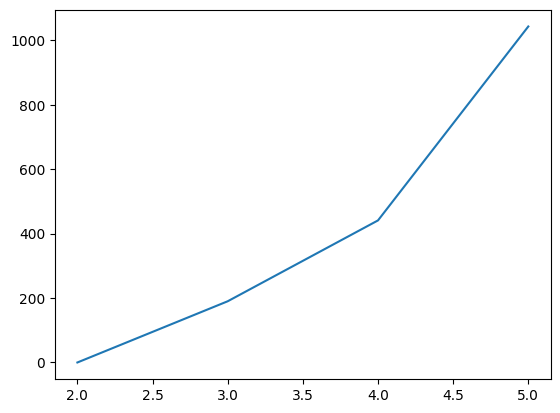

In [17]:
import matplotlib.pyplot as plt
plt.plot(ngram_size_list, time_per_ngram_size_list)